# Kinematics of waterbomb folding and derived characteristics

In [2]:
%matplotlib widget

In [4]:
from bmcs_shell.folding.wb_cell import WBElem

In [5]:
data = dict(alpha=1, a=1, b=1, c=.3)

In [6]:
wb = WBElem(**data)
wb.interact()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

## Cell folding

In [7]:
import sympy as sp
sp.init_printing()
import numpy as np

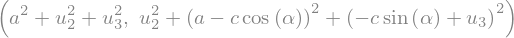

In [11]:
a, b, c = sp.symbols('a, b, c', positive=True)
u_2, u_3 = sp.symbols('u_2, u_3', positive=True)
alpha = sp.symbols('alpha', positive=True)

U0_a = sp.Matrix([a, b, 0])
W0_a = sp.Matrix([c, 0, 0])
UW0_a = W0_a - U0_a
L2_U_0 = (U0_a.T * U0_a)[0]
L2_UW_0 = (UW0_a.T * UW0_a)[0]

U1_a = sp.Matrix([a, u_2, u_3])
W1_a = sp.Matrix([c * sp.cos(alpha), 0, c * sp.sin(alpha)])
UW1_a = U1_a - W1_a
L2_U_1 = (U1_a.T * U1_a)[0]
L2_UW_1 = (UW1_a.T * UW1_a)[0]
L2_U_1, L2_UW_1

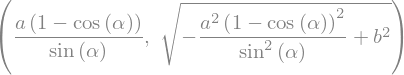

In [12]:
u2_sol = sp.solve(L2_U_1 - L2_U_0, u_2)[0]
u3_sol = sp.solve((L2_UW_1 - L2_UW_0).subs(u_2, u2_sol), u_3)[0]
u_3_ = u3_sol
u_2_ = u2_sol.subs(u_3, u3_sol)
u_3_, u_2_

In [8]:
U_pp_a = U1_a.subs({u_2: u_2_, u_3: u_3_})
U_mm_a = sp.Matrix([-U_pp_a[0], -U_pp_a[1], U_pp_a[2]])
U_mp_a = sp.Matrix([-U_pp_a[0], U_pp_a[1], U_pp_a[2]])
U_pm_a = sp.Matrix([U_pp_a[0], -U_pp_a[1], U_pp_a[2]])
W_p_a = W1_a.subs({u_2: u_2_, u_3: u_3_})
W_m_a = sp.Matrix([-W_p_a[0], W_p_a[1], W_p_a[2]])

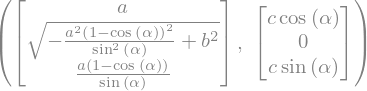

In [9]:
U_pp_a, W_p_a

## Rotation around $x$ axis

In [10]:
V_UW = U_pp_a - W_p_a
L_UW = sp.sqrt(V_UW[1] ** 2 + V_UW[2] ** 2)
theta_sol = sp.simplify(2 * sp.asin( V_UW[2] / L_UW))

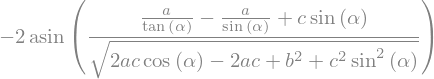

In [11]:
theta_sol

## Offset of a shifted cell

In [13]:
from sympy.algebras.quaternion import Quaternion
theta = sp.Symbol(r'theta')
q_theta = Quaternion.from_axis_angle([1, 0, 0], theta)

In [14]:
d_1, d_2, d_3 = sp.symbols('d_1, d_2, d_3')
D_a = sp.Matrix([d_1, d_2, d_3])

In [15]:
UD_pp_a = U_pp_a + D_a
WD_p_a = W_p_a + D_a

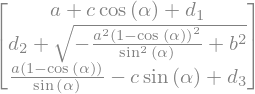

In [17]:
UD_pp_a - W_m_a

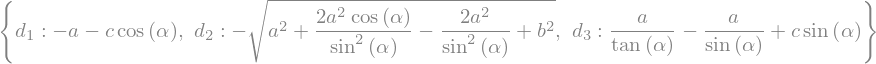

In [18]:
d_subs = sp.solve(UD_pp_a - W_m_a, [d_1, d_2, d_3])
d_subs

## Rotate by $\theta$

Define the center of rotation

In [20]:
UD_pp_a_ = UD_pp_a.subs(d_subs)

Rostated point

In [21]:
WD_p_a_ = WD_p_a.subs(d_subs)

Pull back the point so that the center of rotation is at origin

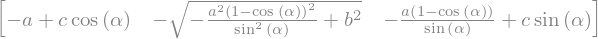

In [22]:
WD_p_a_pb = WD_p_a_ - UD_pp_a_
WD_p_a_pb.T

Rotate the point around the quaternion

In [23]:
WD_p_a_rot = q_theta.rotate_point(WD_p_a_pb.T, q_theta)

Push forward to the center of rotation

In [24]:
WD_p_a_pf = sp.Matrix(WD_p_a_rot) + UD_pp_a_
WD_p_a_theta = WD_p_a_pf.subs(theta, -theta_sol)

Rotate also the midpoint

In [25]:
DD_a_pb = D_a.subs(d_subs) - UD_pp_a_
DD_a_rot = q_theta.rotate_point(DD_a_pb.T, q_theta)
DD_a_pf = sp.simplify(sp.Matrix(DD_a_rot) + UD_pp_a_)
DD_a_theta = DD_a_pf.subs(theta, -theta_sol)

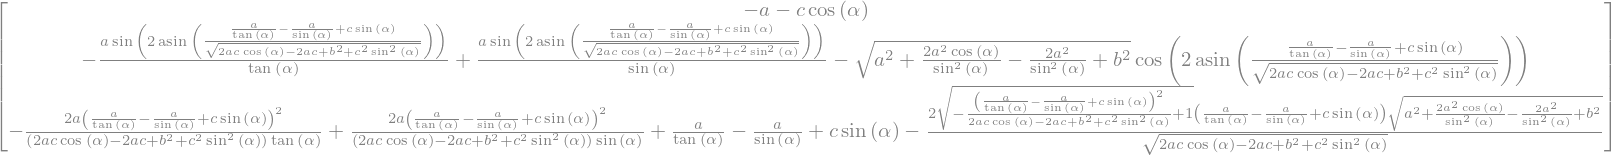

In [26]:
DD_a_theta

In [27]:
get_U_mm_a = sp.lambdify((alpha, a, b, c), U_mm_a )
get_WD_p_a_theta = sp.lambdify((alpha, a, b, c), WD_p_a_theta)

In [28]:
get_U_mm_a(0.2, 3, 10, 1)

array([[-3.        ],
       [-9.9954688 ],
       [ 0.30100402]])

In [29]:
get_WD_p_a_theta(0.2, 3, 10, 1)

array([[-3.        ],
       [-9.9954688 ],
       [ 0.30100402]])

In [30]:
sp.simplify((WD_p_a_theta - U_mm_a)[0])

## Cross sectional height

In [31]:
H = W_p_a[2]
H

In [32]:
V_WD = (WD_p_a_theta - DD_a_theta)
Vzy_WD = sp.Matrix([V_WD[1], V_WD[2]])

In [33]:
L_WD = Vzy_WD.T * Vzy_WD

In [34]:
get_L_WD = sp.lambdify((alpha, a, b, c), L_WD, 'numpy')

In [35]:
np.sqrt(get_L_WD(np.pi/2,2,3,5))

array([[5.]])

## Symmetry axis of the cylinder

In [39]:
D0_a = sp.Matrix([0,0,0])

In [40]:
W_m_a[2]

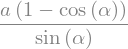

In [41]:
U_mm_a[2]

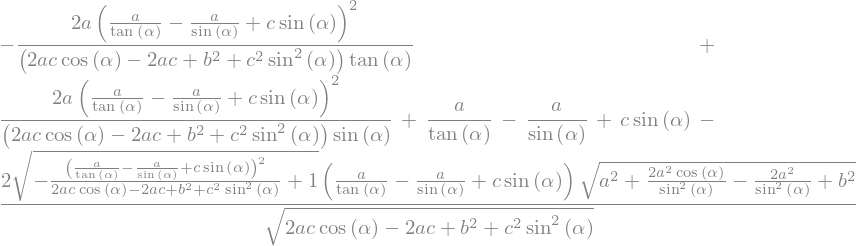

In [42]:
DD_a_theta[2]

Find the point at which the line connection between
\begin{align}
 U_{mm} + \rho (U_{mm} - D)
\end{align}
intersects the vertical axis

In [43]:
rho = (U_mm_a[2] - DD_a_theta[2]) / (U_mm_a[1] - DD_a_theta[1]) * U_mm_a[1]
R_0 = U_mm_a[2] - rho

In [44]:
get_U_mm_a = sp.lambdify((alpha, a, b, c), U_mm_a, 'numpy')
get_DD_a_theta = sp.lambdify((alpha, a, b, c), DD_a_theta, 'numpy')
get_rho = sp.lambdify((alpha, a, b, c), rho, 'numpy')
get_R_0 = sp.lambdify((alpha, a, b, c), R_0, 'numpy')

In [45]:
data = dict(alpha=1, a=1, b=1, c=1)
get_U_mm_a(**data)

array([[-1.        ],
       [-0.83758796],
       [ 0.54630249]])

In [46]:
get_DD_a_theta(**data)

array([[-1.54030231],
       [-0.31003043],
       [-0.10925565]])

In [47]:
get_rho(**data)

In [48]:
get_R_0(**data)

In [49]:
phi_0 = sp.asin( DD_a_theta[1] / R_0 )

In [50]:
get_phi_0 = sp.lambdify((alpha, a, b, c), phi_0, 'numpy')

In [51]:
get_phi_0(**data)